# Machine Learning to understand Amyotrophic Lateral Sclerosis (ALS):
## Using triple stimulation technique (TST) and random forest.

### Author: Dr. Rahul Remanan, CEO/Chief Imagination Officer, Ekaveda Inc.

[This notebook explains the research paper on how machine learning can be used to analyze clinical and neurophysiological data from subjects with amyotrophic lateral sclerosis.](https://arxiv.org/abs/1609.08980)

[Data and code are available under a highly permissive MIT open-source license.](https://github.com/rahulremanan/TST/)

To run this notebook with all the data and dependencies packaged in a simple, easy to access browser interface, consider [buying a subcription for Jomiraki -- the cloud connected artificial intelligence development platform.](https://www.moad.computer/store/p24/Jomiraki_datasci)

## Part 01 -- Data exploration and statistics:

### Load study data:
* Use wget to fetch the csv file from GitHub.
* Eg: wget https://raw.githubusercontent.com/rahulremanan/TST/master/data/TST.csv

In [1]:
new.data = read.csv("../data/TST.csv",header=TRUE,na.strings="NA",sep=",")

### Attach the data to the R-notebook:

In [2]:
attach(new.data)

### Brief description of the data:

#### Vector: Description of the vector
* V1:	    Age in years
* V2:	    Body mass index
* V3:	    McGill single item quality of life score
* V4:	    TST amplitude ratio as percentage
* V5:	    TST area ratio as percentage
* V6:	    MEP:CMAP amplitude ratio
* V7:	    MEP: proximal stimulation amplitude ratio
* V8:	    Inverse of central motor conduction time measured in milliseconds
* V9:	    Motor threshold as a percentage of the maximal output of the TMS stimulator
* V10:	    Forced vital capacity as percentage of the predicted
* V11:	    Inverse of the time to complete walking 20ft measured in seconds
* V12:	    Inverse of the time to standup from a chair measured in seconds
* V13:	    Inverse of the time to climb up and down 4 steps of stairs measured in seconds
* V14:	    Inverse of the time to propel a wheelchair 20ft measured in seconds
* V15:	    Grip force testing using Jamar dynamometer in kg
* V16:	    Lateral pinch grip in kg
* V17:	    Timed Purdue peg board test
* V18:	    Timed block and board test
* V19:	    Manual muscle strength testing of the upper extremity using MRC scale
* V20:	    Manual muscle strength testing of the lower extremity using MRC scale
* V21:	    Duration of the disease in years
* V22:	    Gender (0=male, 1=female)
* V23:	    Visual analogue scale
* V24:	    Presence or absence of bulbar symptoms (0=no, 1=yes)
* V25:	    Race (1=Caucasian, 2=Black/African American, 3=Asian, 4=Hispanic)
* V26:	    Handedness (0=left,1=right)
* V27:	    Smoking status (0=no, 1=yes)
* V28:	    Distal compound muscle action potential (CMAP) amplitude (μV)
* V29:	    Proximal stimulation response amplitude (μV)
* V30:	    Motor evoked potential amplitude (μV)

### Basic data pre-processing:

In [3]:
cor.data   <- new.data[,-c(1:2)]
cor.data   <- cor.data[,-c(24:32)]
cor.data.m <- cor.data[ !apply(is.na(cor.data), 1,any), ]

### Compute average age of the study population:

* Gender  is encoded as a binary variable.
* 0=male
* 1=female

In [4]:
mean.age <- aggregate(new.data$V1, list(Gender=new.data$V22), mean)
sd.age <- aggregate(new.data$V1, list(Gender=new.data$V22), sd)

In [5]:
mean.age

Gender,x
0,56.26087
1,57.86667


 ### Compute standard deviation for age:
 
* Gender  is encoded as a binary variable.
* 0=male
* 1=female

In [6]:
sd.age

Gender,x
0,11.757617
1,7.691165


### Perform t-test for age between genders:

In [7]:
t.age <- t.test(new.data$V1~new.data$V22,
                alternative ="two.sided", mu = 0, paired = FALSE, var.equal = FALSE)

In [8]:
t.age


	Welch Two Sample t-test

data:  new.data$V1 by new.data$V22
t = -0.71979, df = 73.994, p-value = 0.4739
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.051029  2.839435
sample estimates:
mean in group 0 mean in group 1 
       56.26087        57.86667 


### Welch Two Sample t-test -- Summary for age and gender:

* p-value >0.05
* No singificant difference in age between genders
* Indicative of sampling done using similar age groups for both genders

### TST amplitude ratio (rAmp) correlations with central motor conduction time (CMCT) & motor threshold (MT):

In [9]:
CMCT.rAmp<-lm(new.data$V4~new.data$V8)
MT.rAmp<-lm(new.data$V4~new.data$V9)

### Compute correlations between rAmp and ALS disease severity measures:

In [10]:
ALSFRSr.rAmp<-(lm(new.data$ALSFRSr~new.data$V4)) # rAmp
AALS.rAmp<-(lm(new.data$AALS~new.data$V4)) # rAmp

### Compute correlations between CMCT and ALS disease severity measures:

In [11]:
ALSFRSr.CMCT<-(lm(new.data$ALSFRSr~new.data$V8)) # CMCT
AALS.CMCT<-(lm(new.data$AALS~new.data$V8)) # CMCT

### Compute correlations between MT and ALS disease severity measures:

In [12]:
ALSFRSr.MT<-(lm(new.data$ALSFRSr~new.data$V9)) # Motor threshold
AALS.MT<-(lm(new.data$AALS~new.data$V9)) # Motor threshold

### Generate a model predicting ALSFRSr scores, only using the TMS parameters:

In [13]:
tms.model <- (ALSFRSr ~ V4+V5+V6+V7+V8+V9)

In [14]:
lmmodel.tms <- (lm(tms.model, data=new.data,na.action=na.omit))

### Generate summary for the linear model predicting ALSFRSr scores using just the TMS parameters:

In [15]:
summary(lmmodel.tms)


Call:
lm(formula = tms.model, data = new.data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.748  -2.998   1.028   2.924  10.314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 20.81945   14.21713   1.464    0.148
V4           0.14831    0.09111   1.628    0.108
V5          -0.11742    0.08995  -1.305    0.196
V6          11.93704    8.53840   1.398    0.167
V7          -0.50431   14.90126  -0.034    0.973
V8          28.69687   20.46667   1.402    0.165
V9           0.13729    0.14158   0.970    0.336

Residual standard error: 5.505 on 67 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2804,	Adjusted R-squared:  0.216 
F-statistic: 4.351 on 6 and 67 DF,  p-value: 0.0009103


### Import dependent R libraries for generating summary plots:

In [16]:
options(warn=-1)
library(Hmisc)
library(reshape2)
library(ggplot2)
library(GGally)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



### Extract just the TMS parameters from the entire data:

In [17]:
tms <- cor.data.m[c(3,6,7,9,10,11)]

### Label all the TMS parameters:

In [18]:
dta <- data.frame("ALSFRSr"=tms$ALSFRSr, 
                  "Inv-CMCT"=tms$V8, 
                  "rAMp"=tms$V4,
                  "rArea"=tms$V5, 
                  "MEP-CMAP ratio"=tms$V7, 
                  "MT"=tms$V9)

### Function to generate scatter plot:

In [19]:
panel.cor <- function(x, y, digits=2, cex.cor)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits=digits)[1]
  test <- cor.test(x,y)
  Signif <- ifelse(round(test$p.value,3)<0.001,"p<0.001",paste("p=",round(test$p.value,3)))
  text(0.5, 0.25, paste("r=",txt))
  text(.5, .75, Signif)
}

### Function to perform Locally Weighted Scatterplot Smoothing (LOWESS):

In [20]:
panel.smooth<-function (x, y, col = "blue", bg = NA, pch = 16,
                        cex = 0.8, col.smooth = "red", span = 2/3, iter = 3, ...)
{
  points(x, y, pch = pch, col = col, bg = bg, cex = cex)
  ok <- is.finite(x) & is.finite(y)
  if (any(ok))
    lines(stats::lowess(x[ok], y[ok], f = span, iter = iter),
          col = col.smooth, ...)
}

### Function to generate distribution histogram:

In [21]:
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col="cyan", ...)
}

### Generate matrix plot summarizing relationship between ALS disease severity measures and TMS data:

In [22]:
data <- dta
svg(file="../R_output/ALSFRSr-TMS Matrix Summary.svg")
pairs(data,
      lower.panel=panel.smooth, 
      upper.panel=panel.cor,
      diag.panel=panel.hist)
dev.off()

png 
  2

### Visualize the matrix plot in R-notebook:

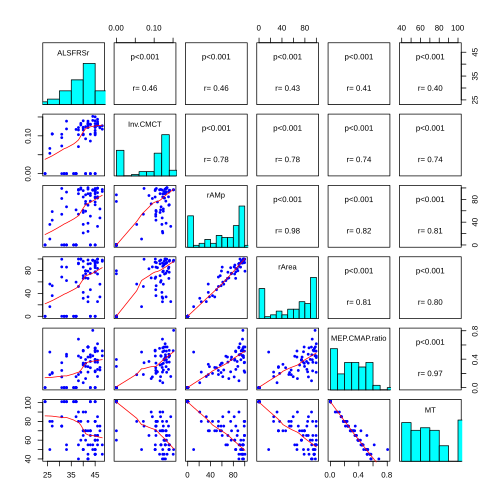

In [23]:
library("IRdisplay")
display_svg(file="../R_output/ALSFRSr-TMS Matrix Summary.svg")

### Generate heatmap plot to summarize the correlations existing within the entire data:

In [24]:
data <- cor.data.m

In [25]:
png("../R_output/heatmap_correlation_matrix_all.png")
rplot <- qplot(x=Var1, y=Var2, data=melt(cor(data, use="p")), fill=value, geom="tile") +
               scale_fill_gradient2(limits=c(-1, 1))
rplot +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=12),
        axis.text.y  = element_text(angle=21, vjust=0.5, size=12))
dev.off()

png 
  2

### Visualize the matrix plot in R-notebook:

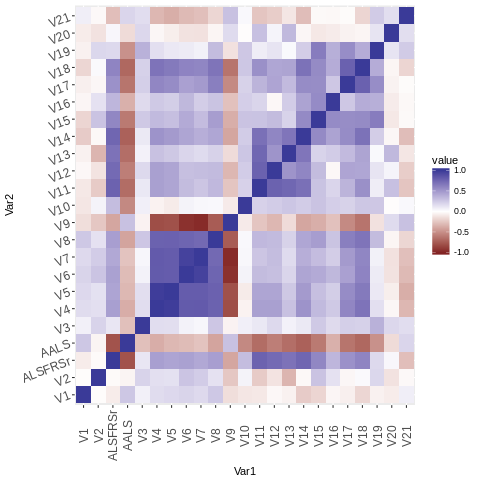

In [26]:
library("IRdisplay")
display_png(file="../R_output/heatmap_correlation_matrix_all.png")  